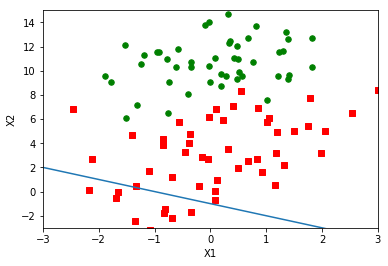

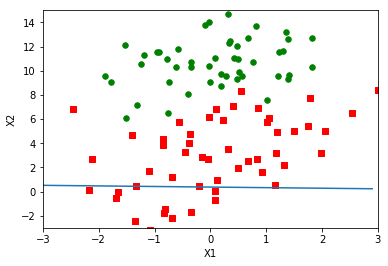

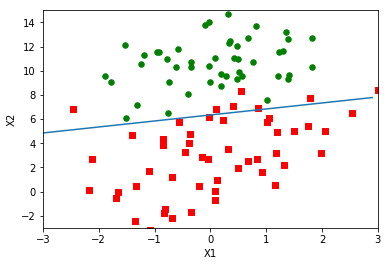

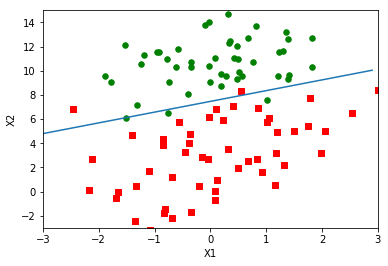

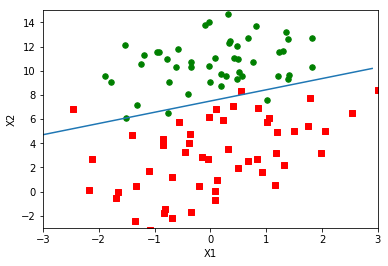

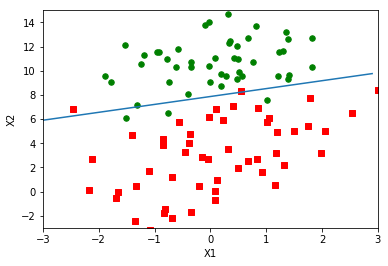

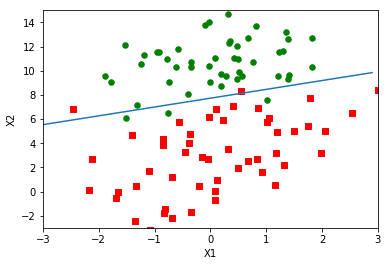

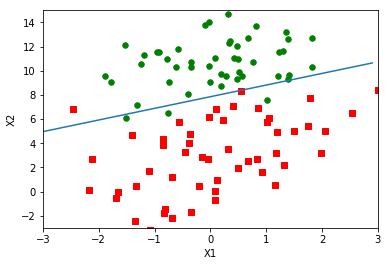

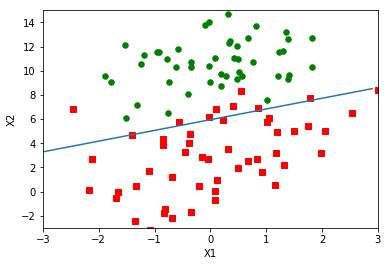

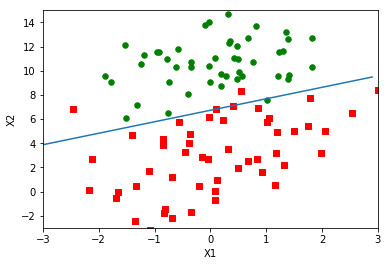

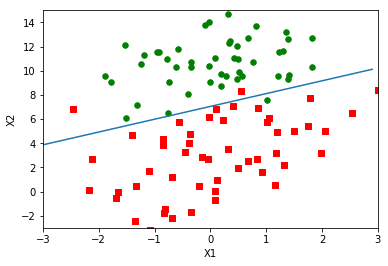

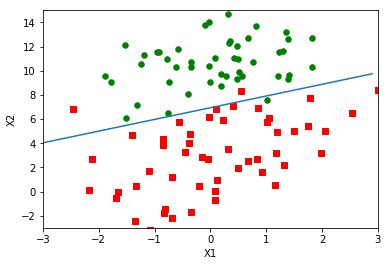

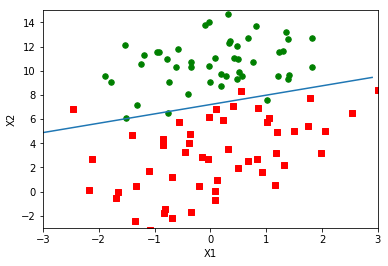

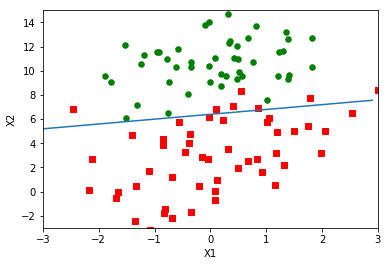

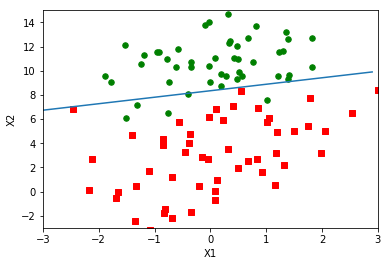

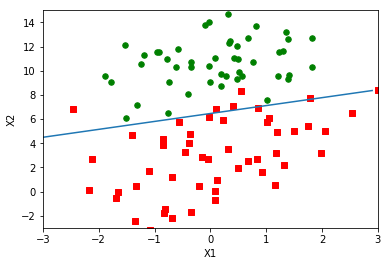

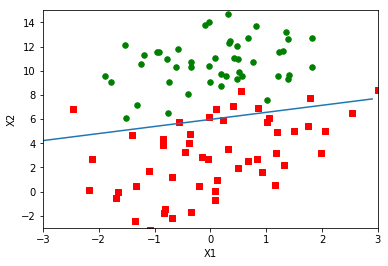

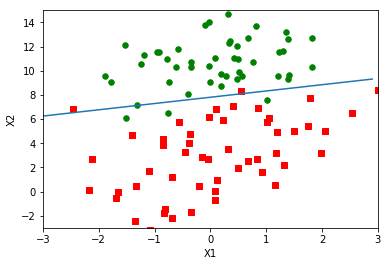

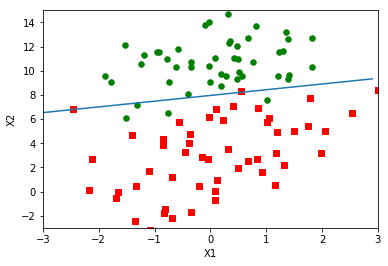

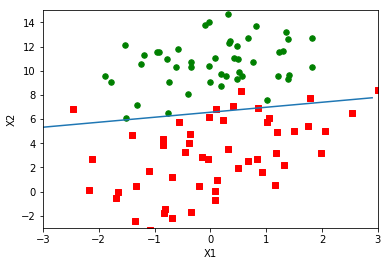

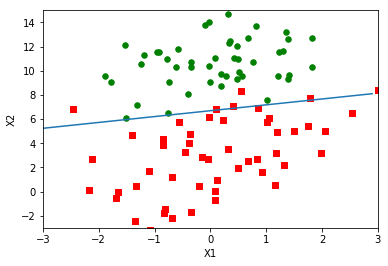

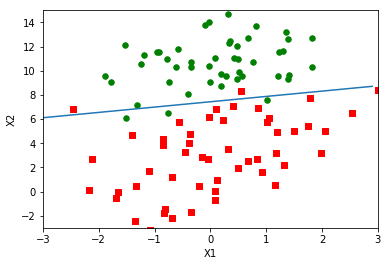

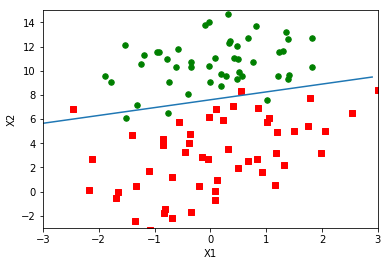

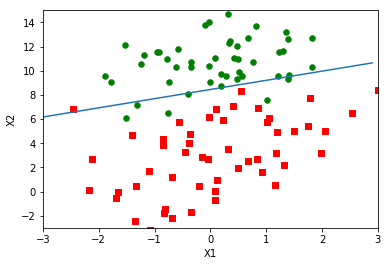

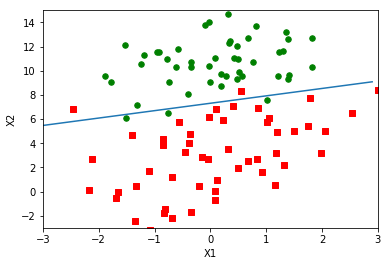

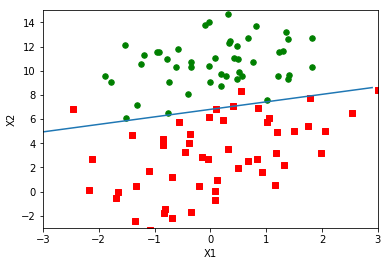

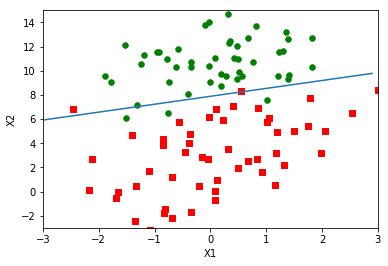

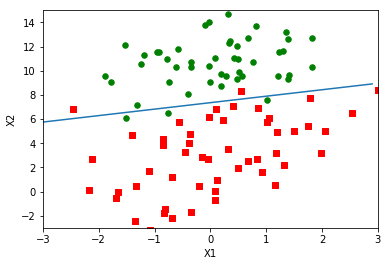

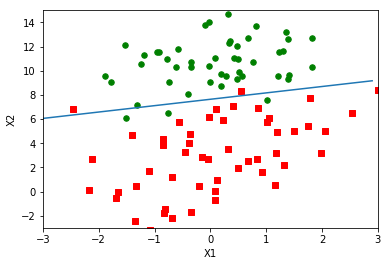

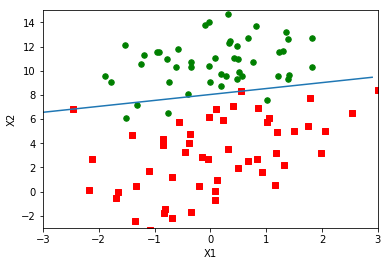

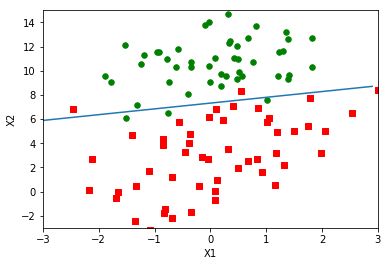

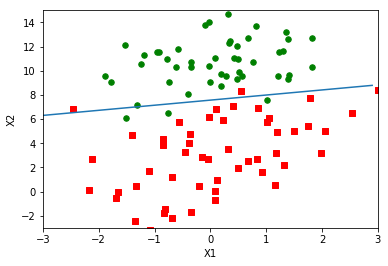

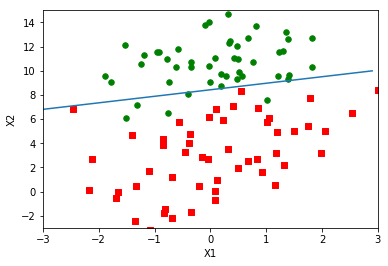

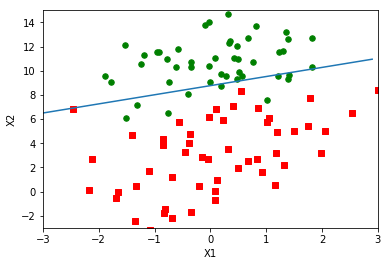

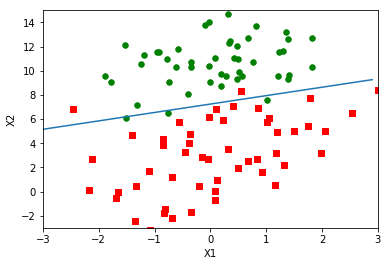

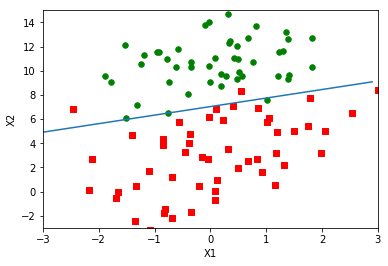

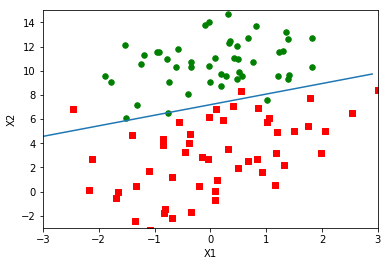

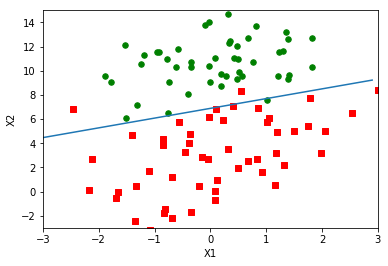

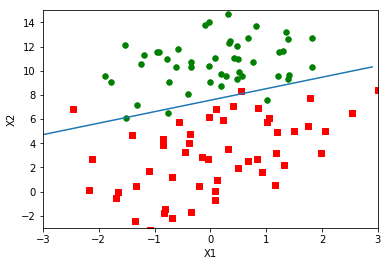

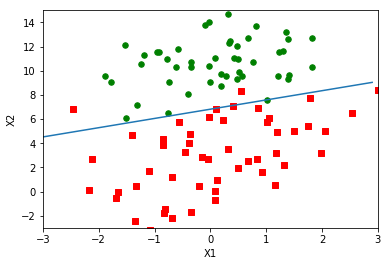

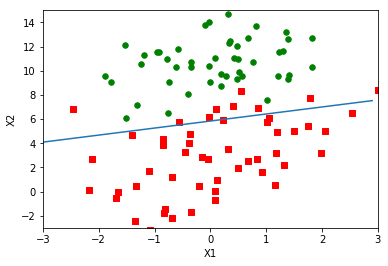

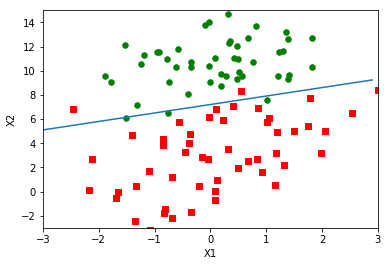

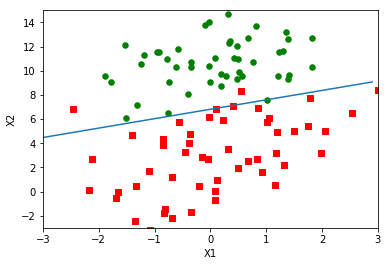

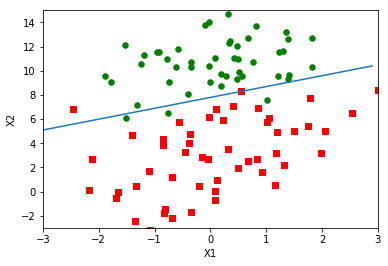

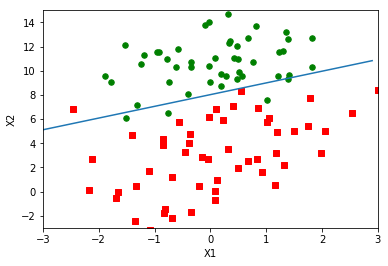

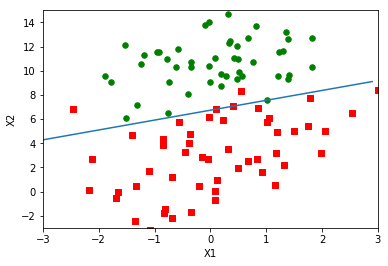

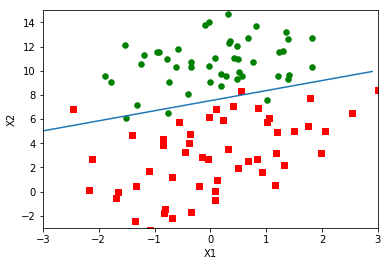

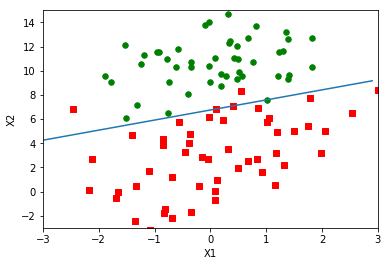

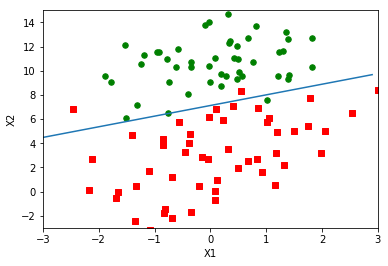

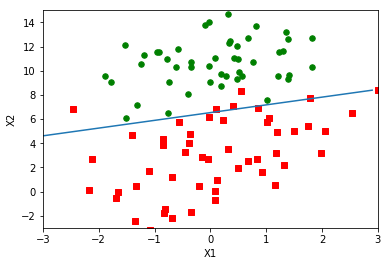

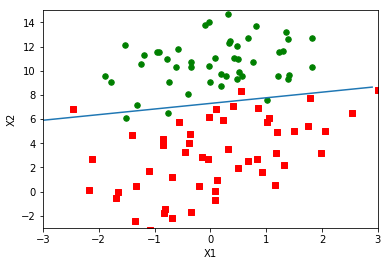

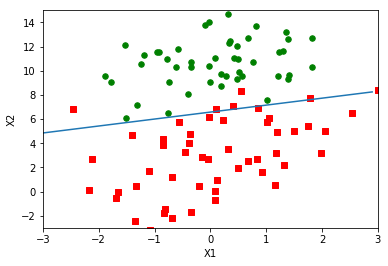

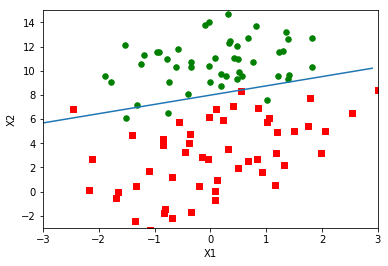

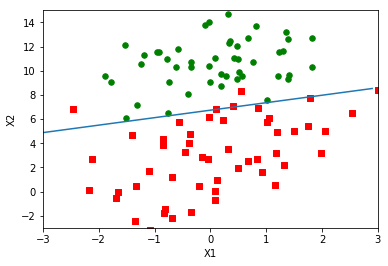

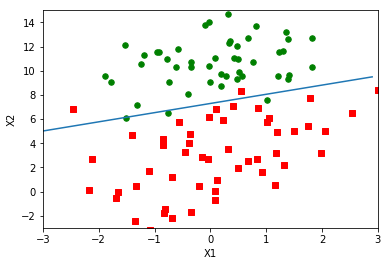

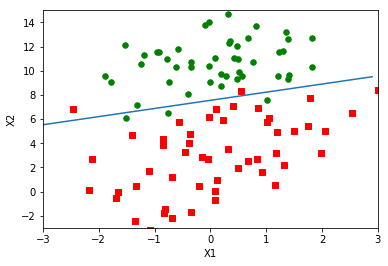

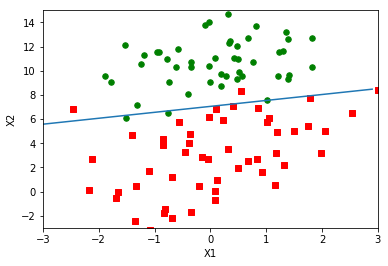

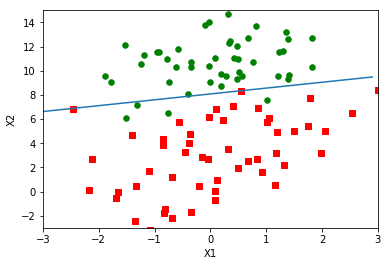

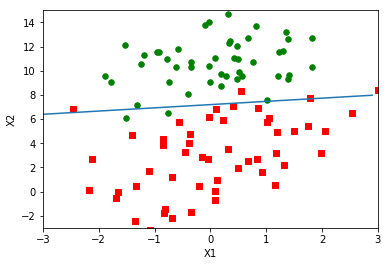

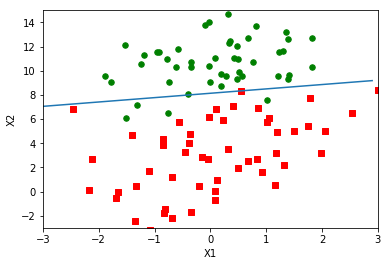

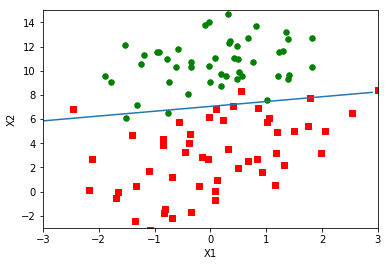

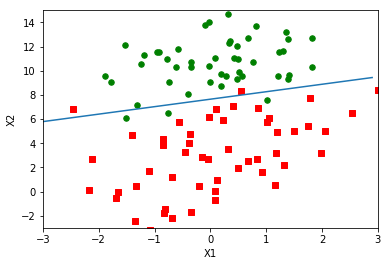

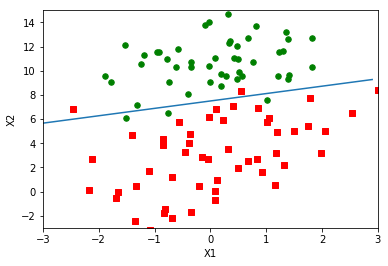

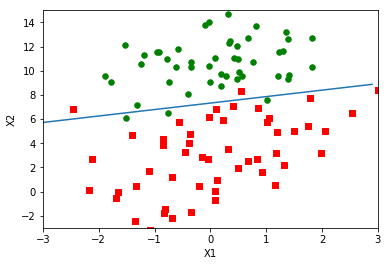

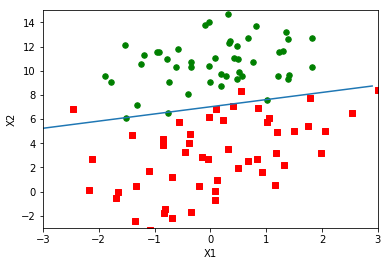

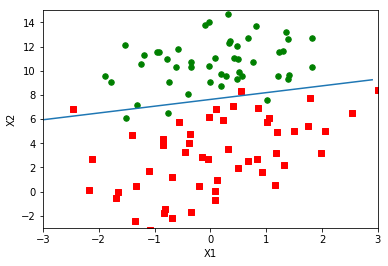

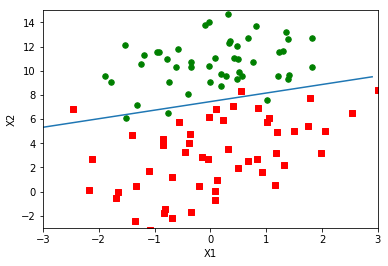

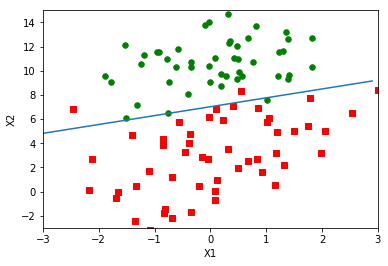

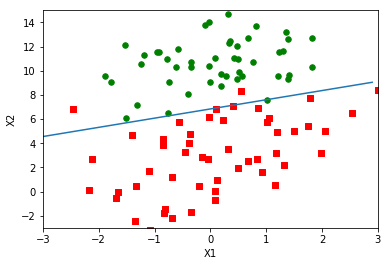

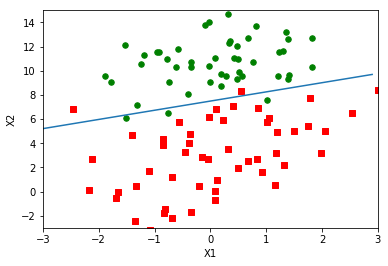

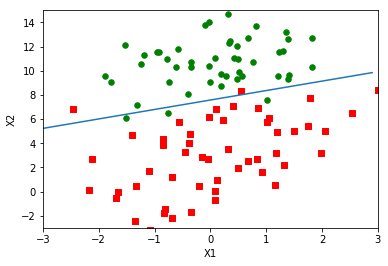

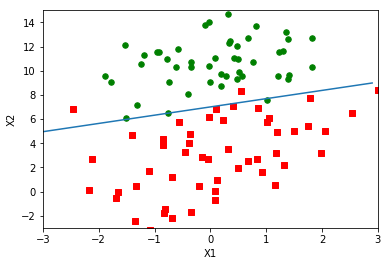

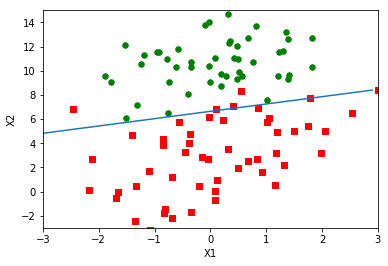

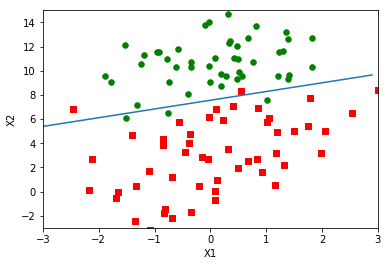

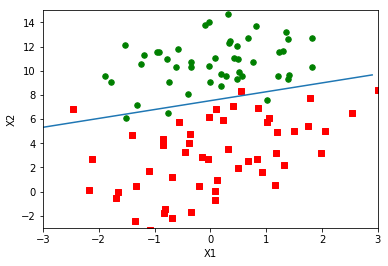

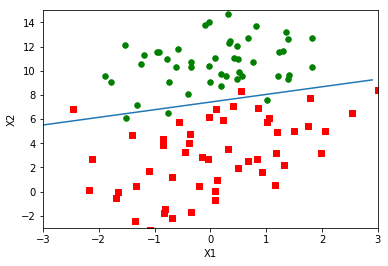

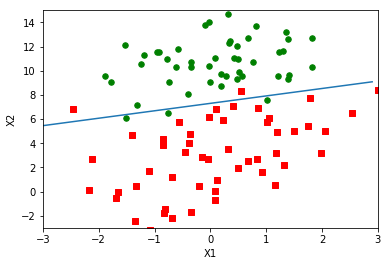

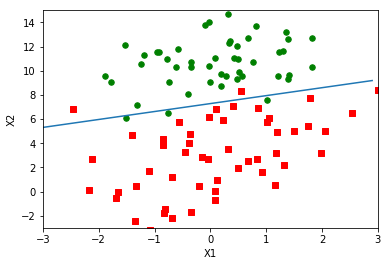

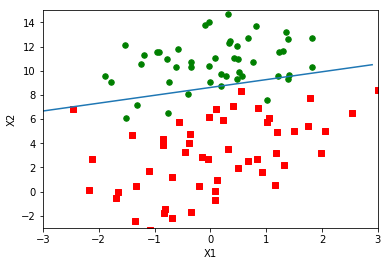

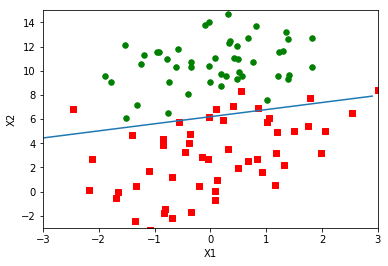

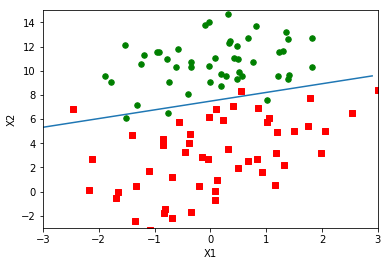

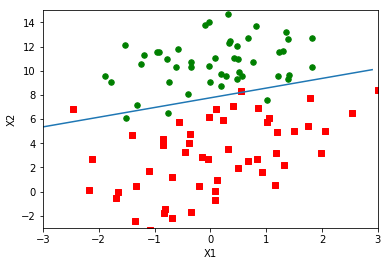

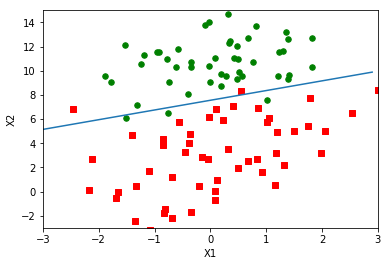

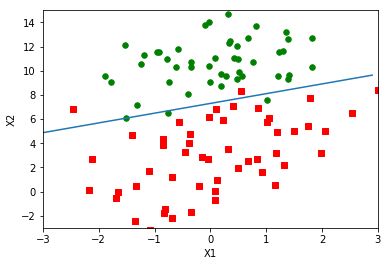

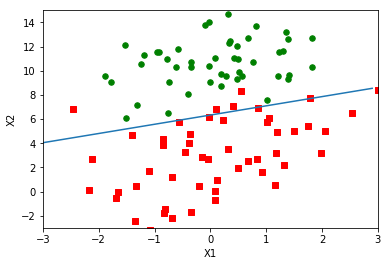

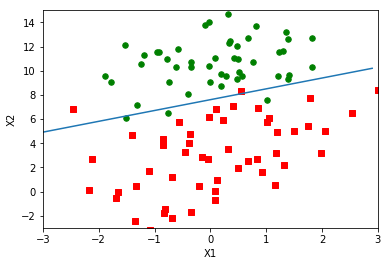

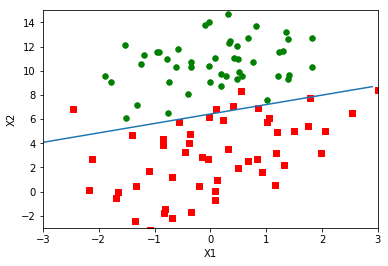

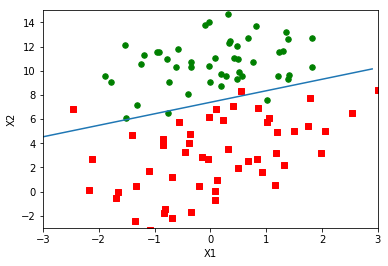

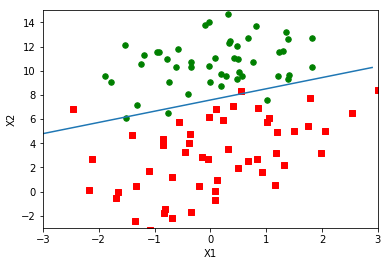

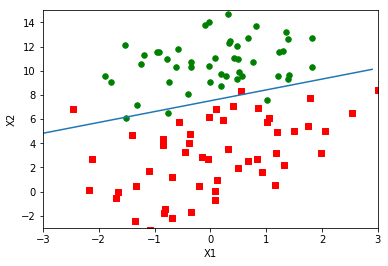

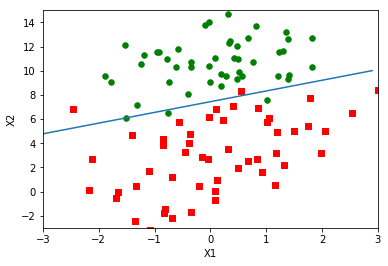

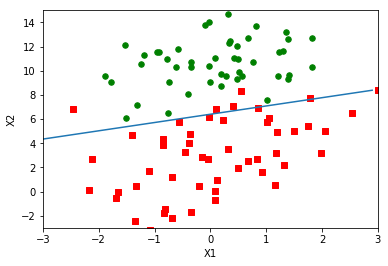

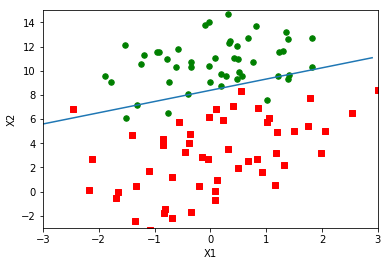

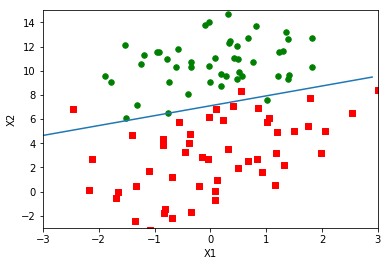

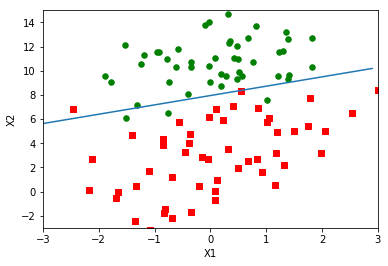

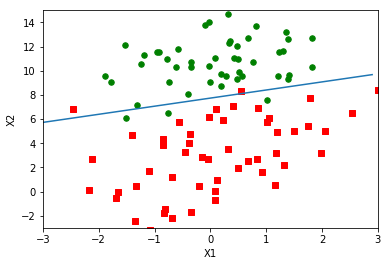

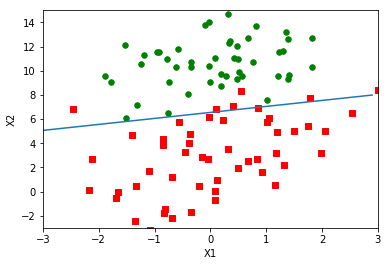

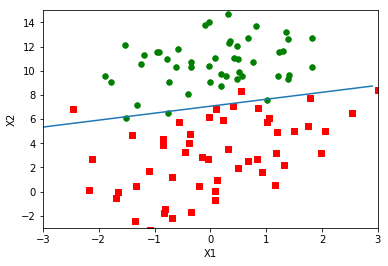

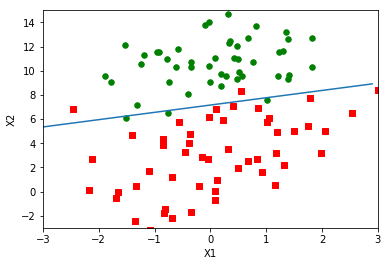

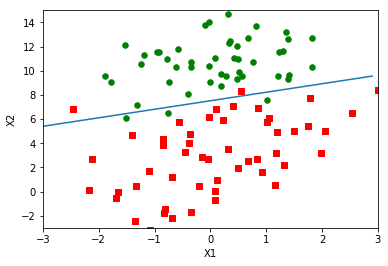

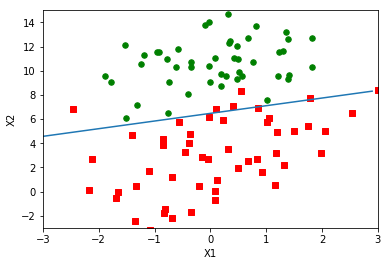

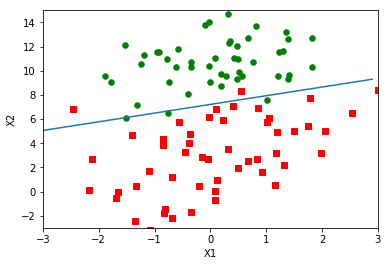

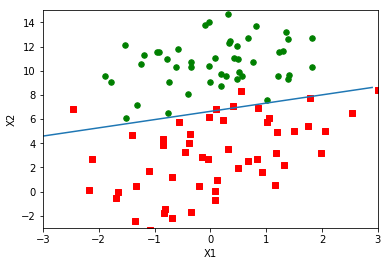

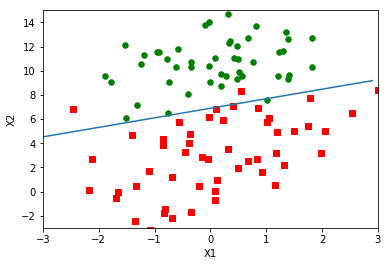

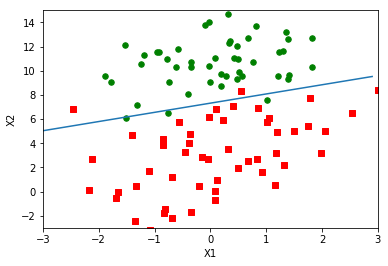

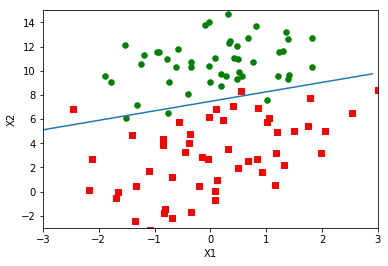

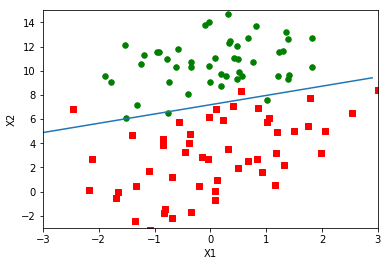

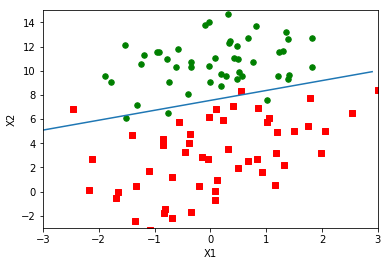

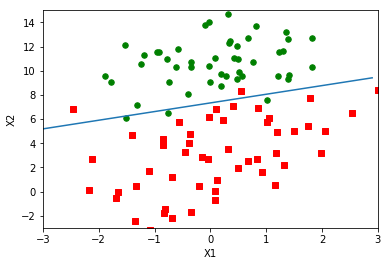

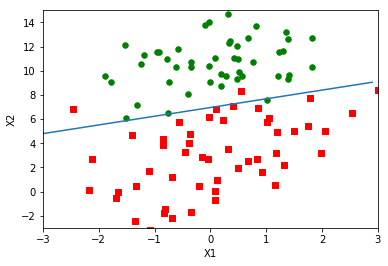

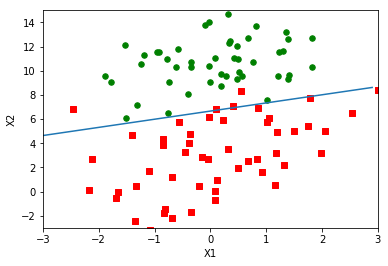

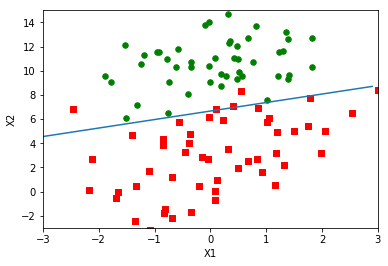

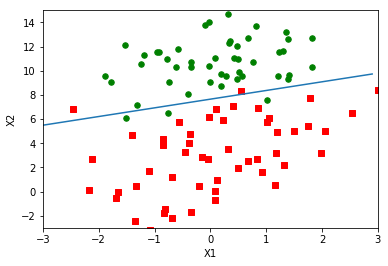

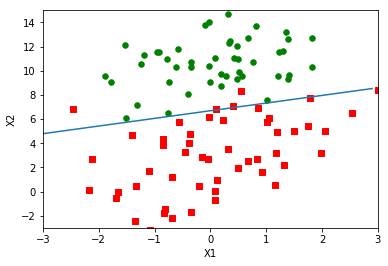

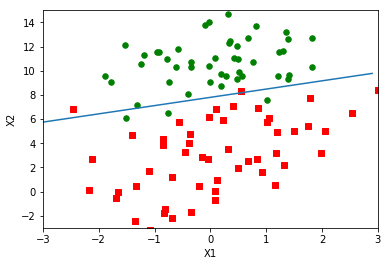

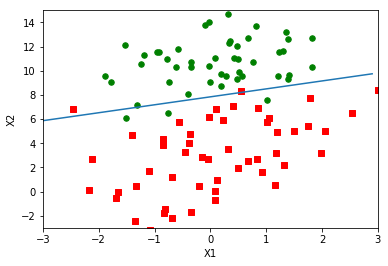

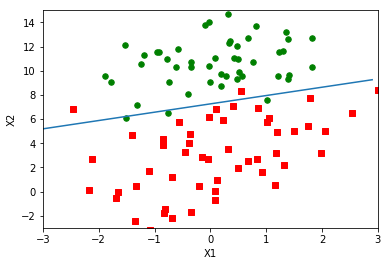

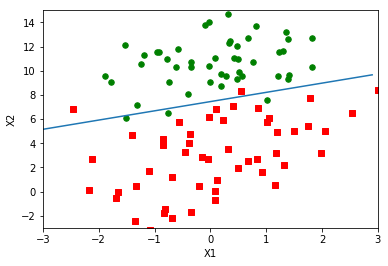

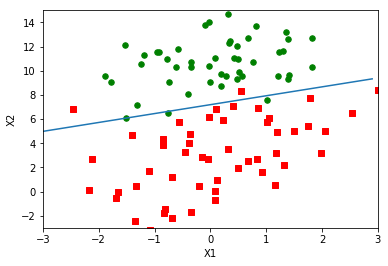

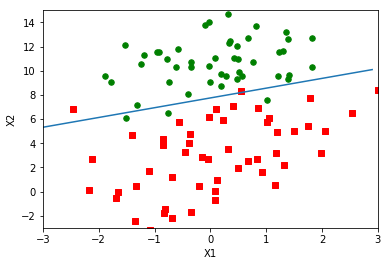

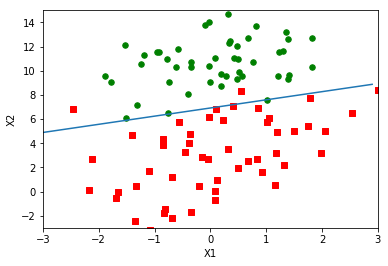

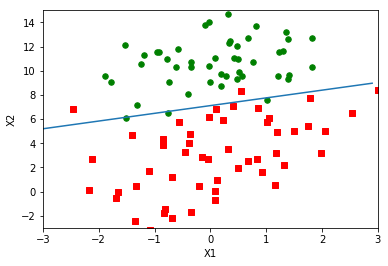

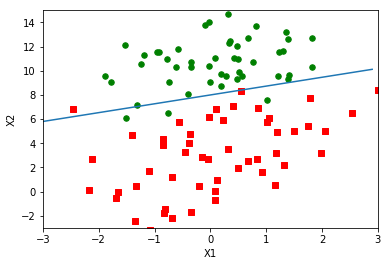

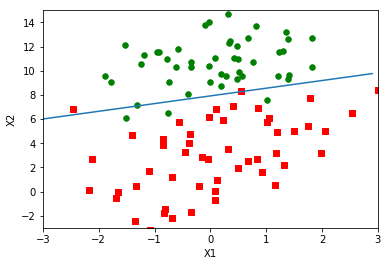

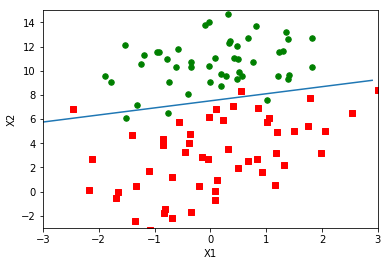

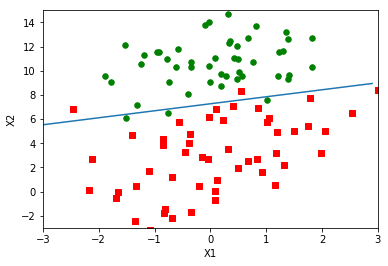

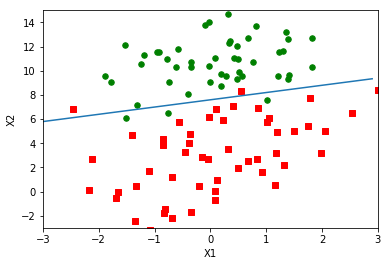

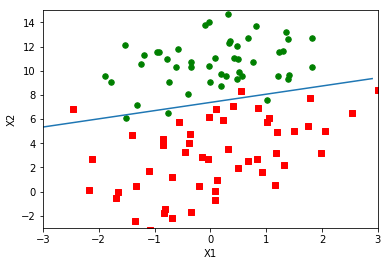

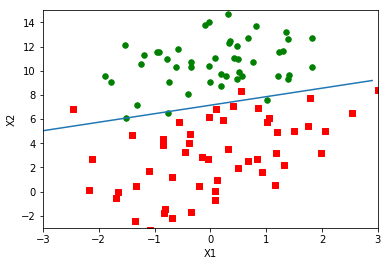

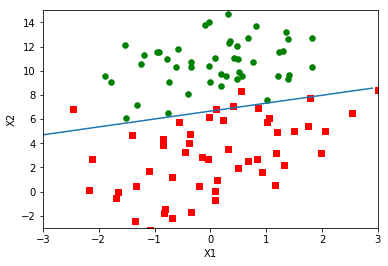

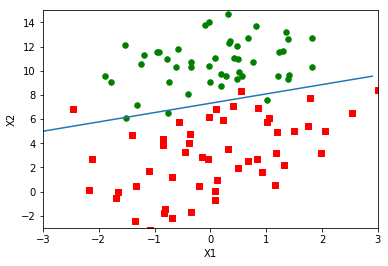

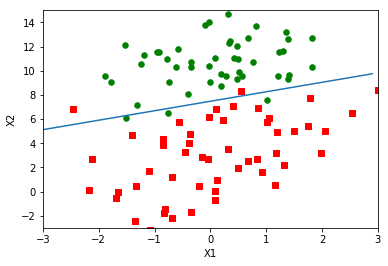

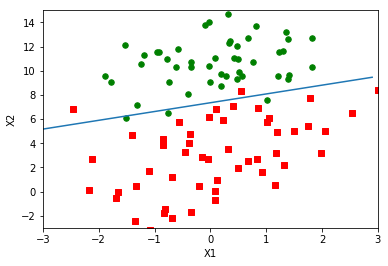

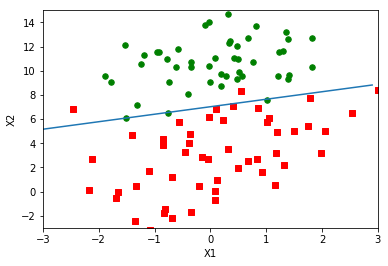

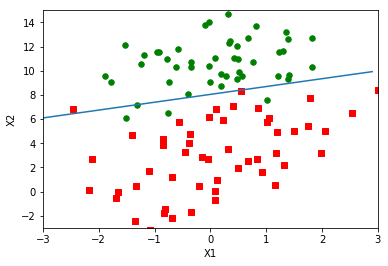

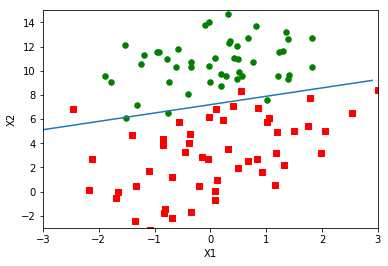

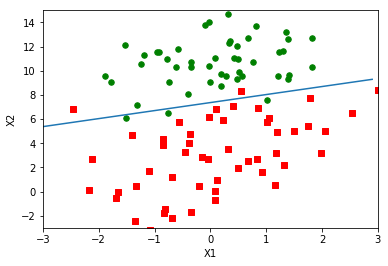

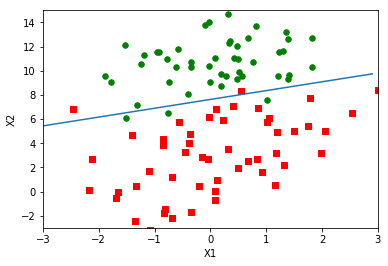

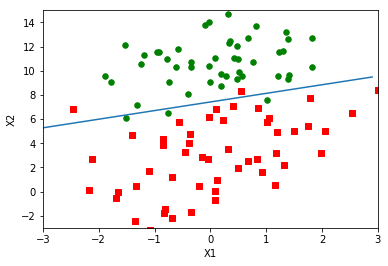

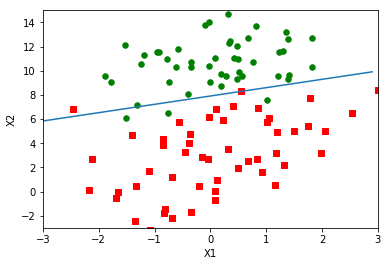

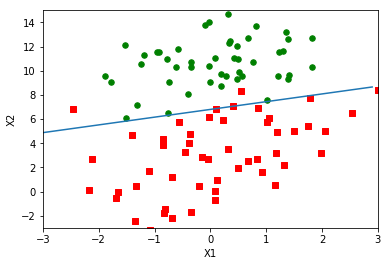

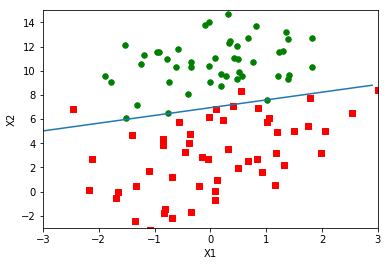

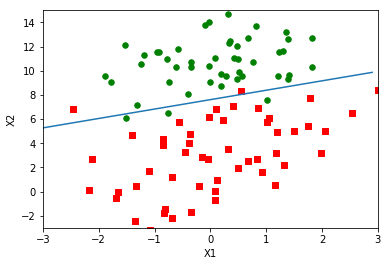

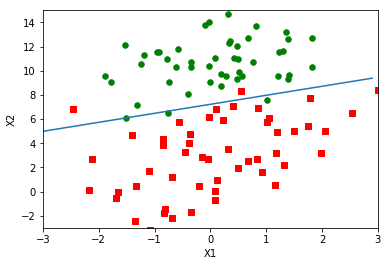

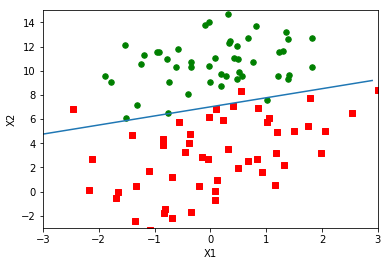

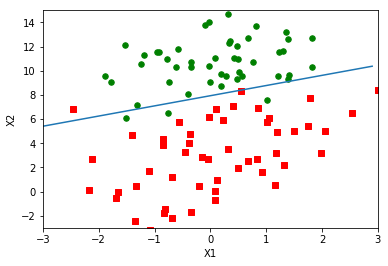

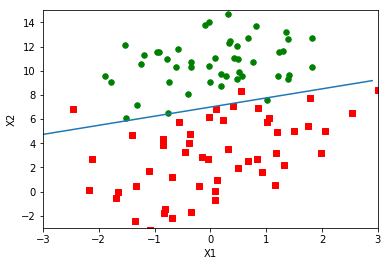

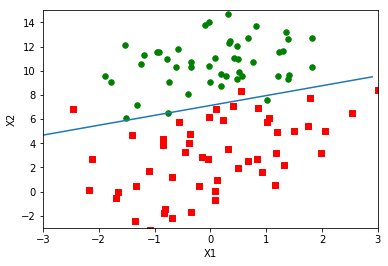

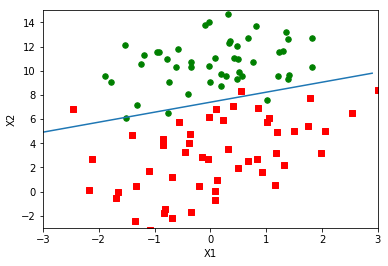

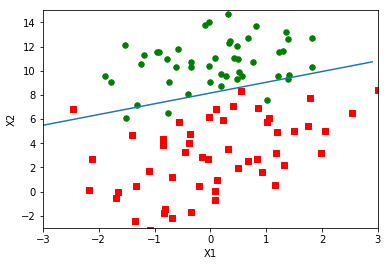

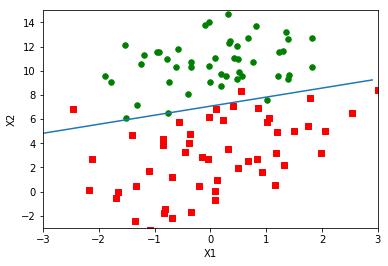

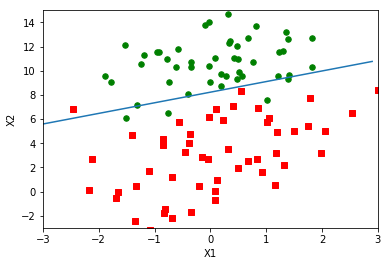

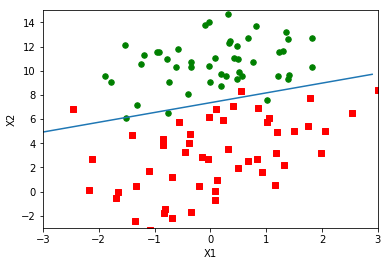

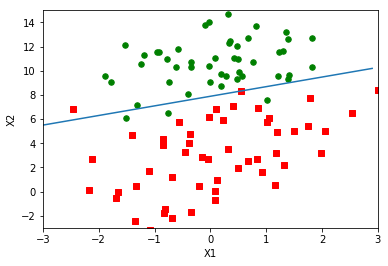

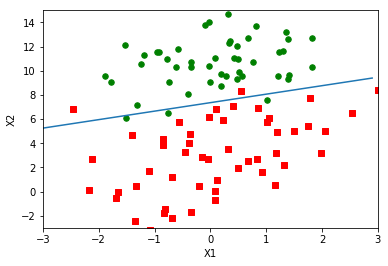

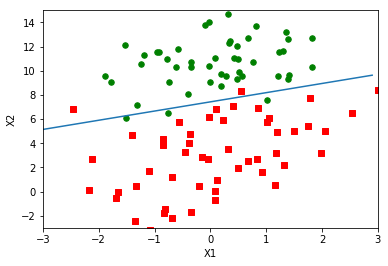

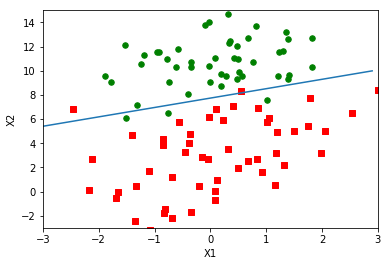

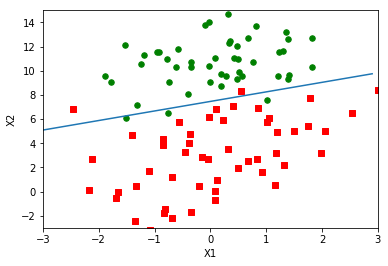

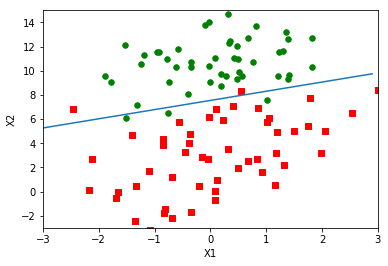

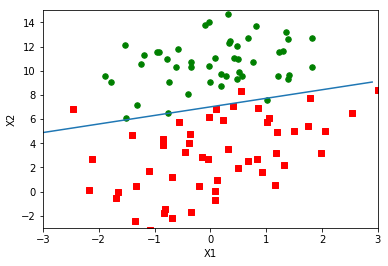

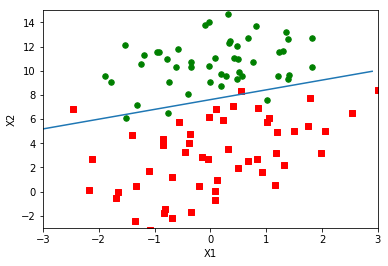

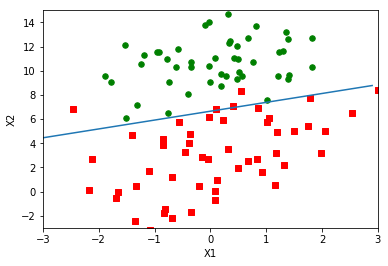

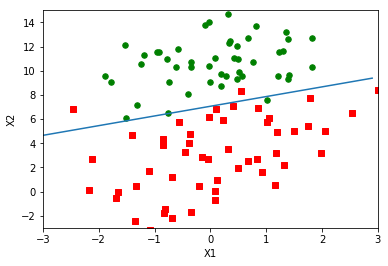

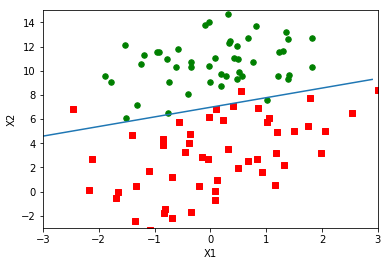

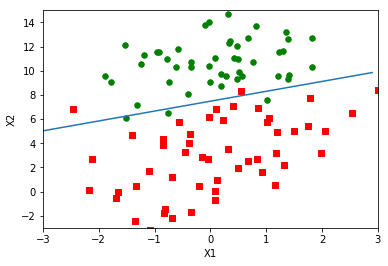

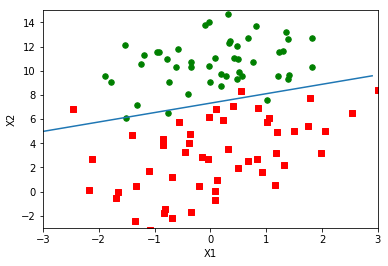

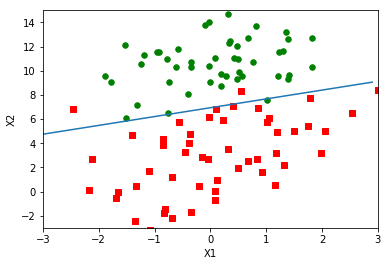

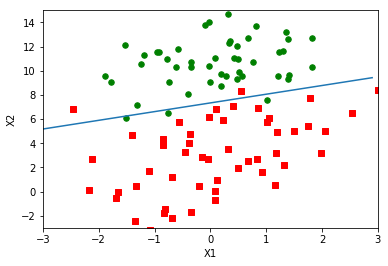

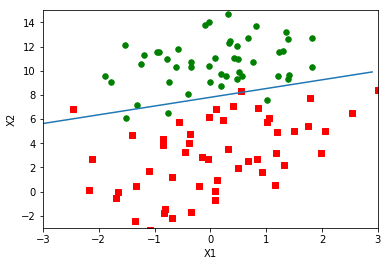

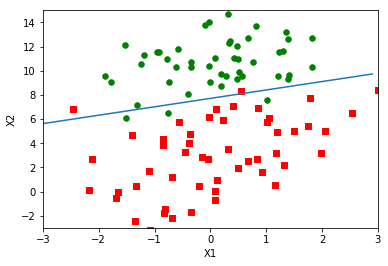

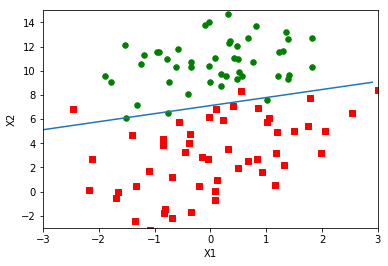

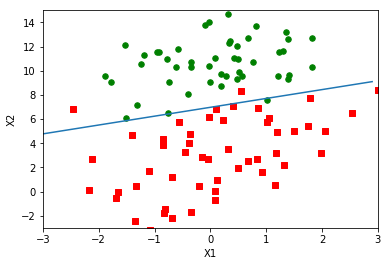

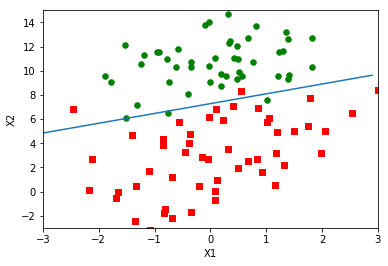

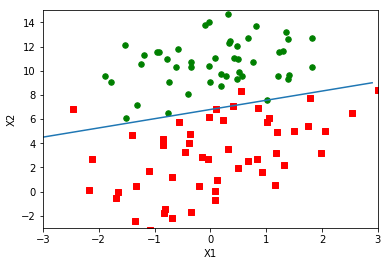

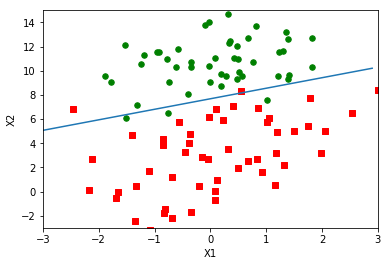

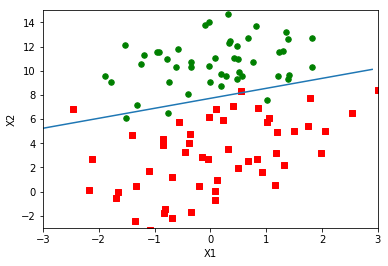

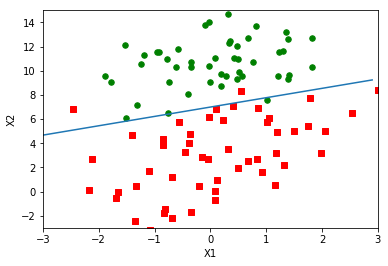

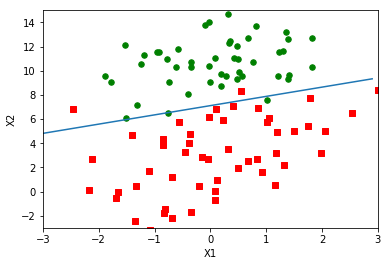

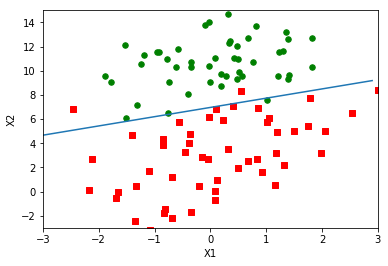

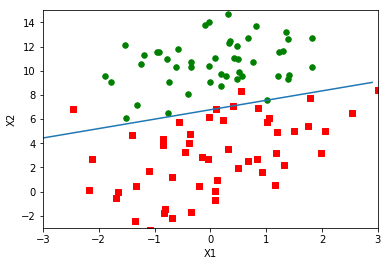

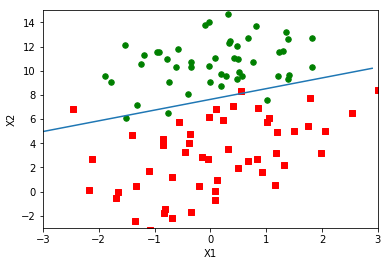

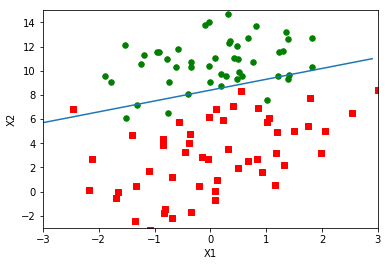

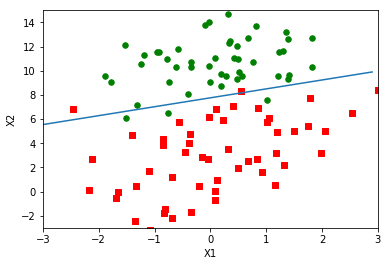

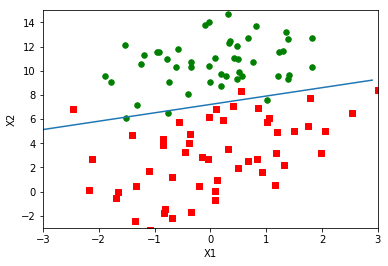

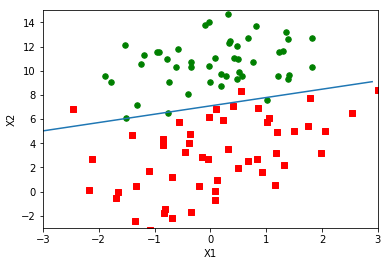

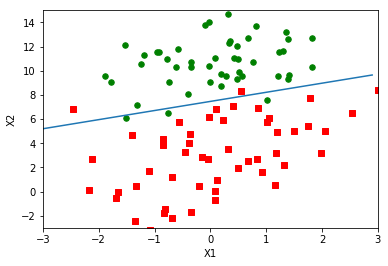

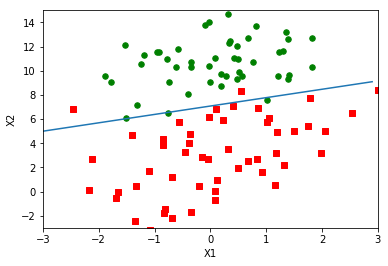

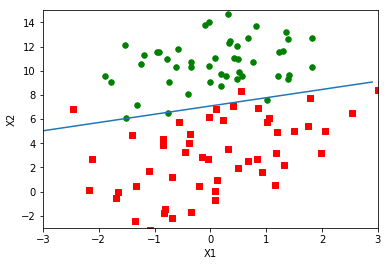

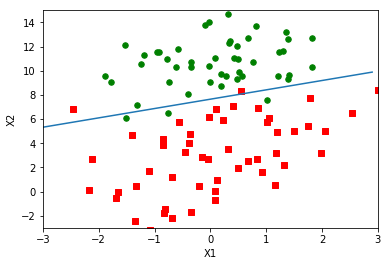

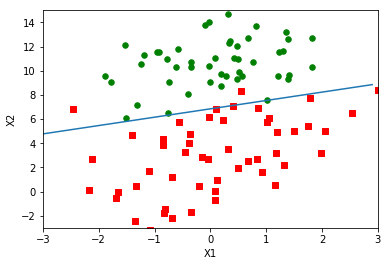

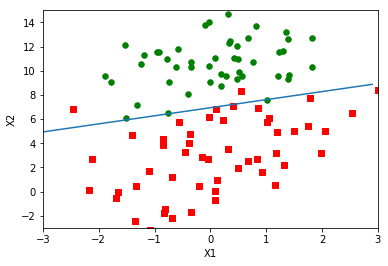

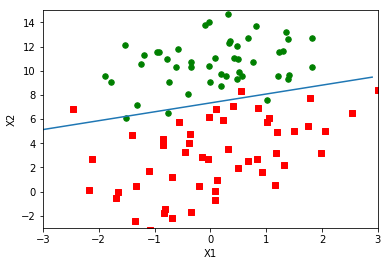

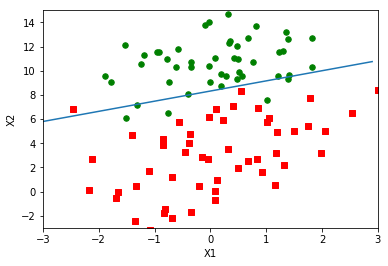

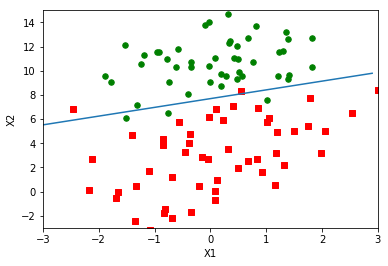

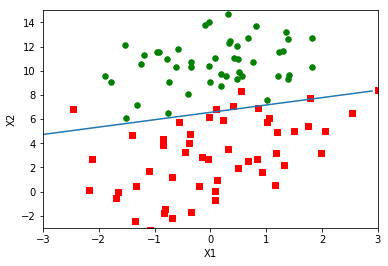

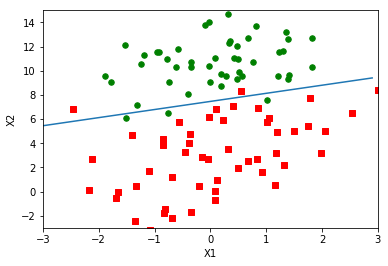

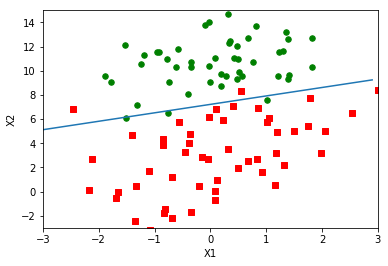

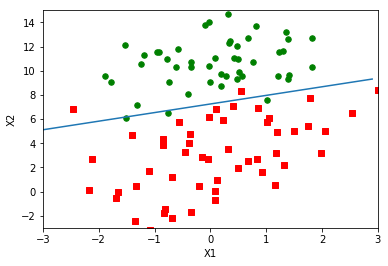

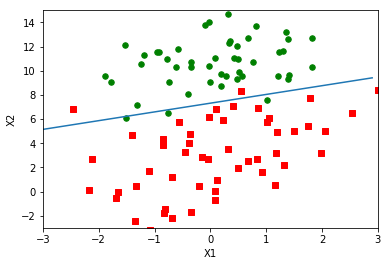

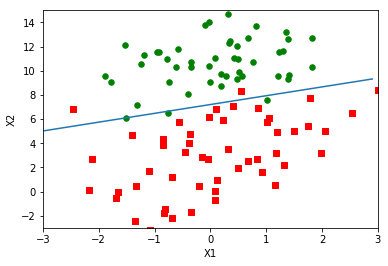

array([14.52092998,  1.36646727, -1.76753418])

In [4]:
from numpy import *
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def LoadDataSet():
    data = []
    label = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split() #去除首尾的空格，并按照空格split
        data.append([1.0,float(lineArr[0]),float(lineArr[1])]) #第一个1.0对应的相当于是b
        label.append(int(lineArr[2]))
    return data,label

def draw_pic(weights, num):
    dataMat,labelMat=LoadDataSet()
    dataArr = array(dataMat)
    #weights = gradAscent(dataArr,labelMat)

    n = shape(dataArr)[0] #number of points to create
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []

    markers =[]
    colors =[]
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.scatter(xcord,ycord, c=colors, s=markers)
    type1 = ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    type2 = ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    #weights = [-2.9, 0.72, 1.29]
    #weights = [-5, 1.09, 1.42]
    #weights = [13.03822793,   1.32877317,  -1.96702074]
    #weights = [4.12,   0.48,  -0.6168]
    y = (-weights[0]-weights[1]*x)/weights[2]
    y = y.T
    ax.plot(x, y)
    #ax.legend([type1, type2, type3], ["Did Not Like", "Liked in Small Doses", "Liked in Large Doses"], loc=2)
    #ax.axis([-5000,100000,-2,25])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(-3, 3)
    plt.ylim(-3, 15)
    plt.savefig("result_SGD/filename_" + str(num).zfill(3) + ".png")
    plt.show()
    
def logistic(X):
    return 1.0/(1+exp(-X))

def stocGradAscent(dataMatrix,classLabels): #梯度下降法
    m,n = shape(dataMatrix) #m个样本，n个特征
    num = 1
    maxCycles = 200
    weights = ones(n) #每个特征的权重
    for j in range(maxCycles):
        draw_pic(weights, num)
        num = num + 1
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0 + j + i) + 0.01 #动态调整步长
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = logistic(sum(dataMatrix[randIndex] * weights))
            error = h - classLabels[randIndex]
            #下面的写法是按照梯度下降写的，当然也可以按照梯度上升来写
            weights = weights - alpha * dataMatrix[randIndex] * error  
        
    return weights

dataMat,labelMat=LoadDataSet()
dataArr = array(dataMat)
stocGradAscent(dataArr,labelMat)